# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# artificial neural network

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# loading the dataset

In [3]:
data=pd.read_csv("iris.data")

In [4]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
path="iris.data"
colname=["sepal_length","sepal_width","petal_length","petal_width","class"]
data=pd.read_csv(path,header=None,names=colname)

In [6]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# handling missing values

In [7]:
# #the number of columns, column labels, column data types, memory usage, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#describe
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# find the all value counts columns

In [9]:
for i in data:
    s=data[i].value_counts()
    print(f'value_counts:\n{s}\n')

value_counts:
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

value_counts:
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

value_counts:
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3

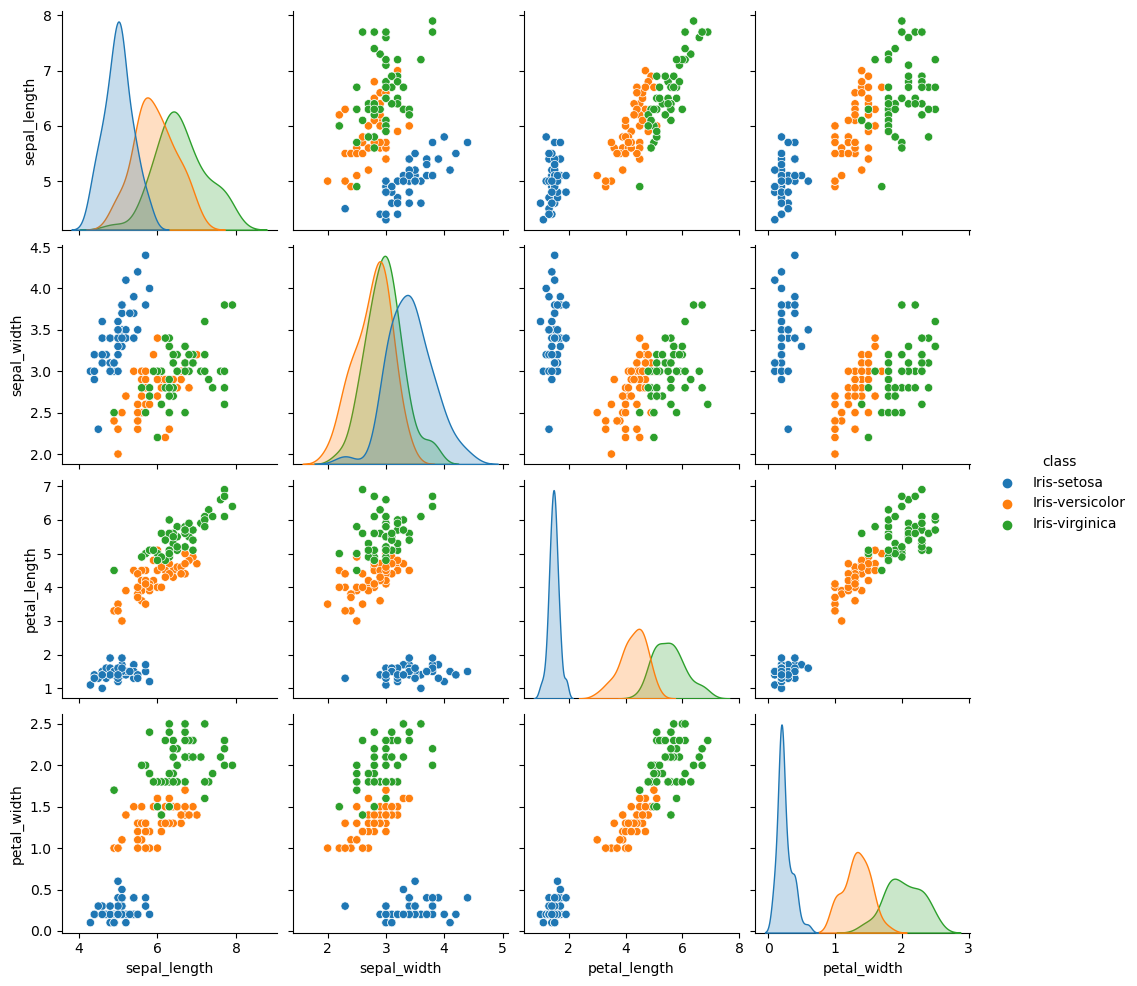

In [10]:
sns.pairplot(data=data,hue="class")
plt.show()

In [11]:
data.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# find the outliers

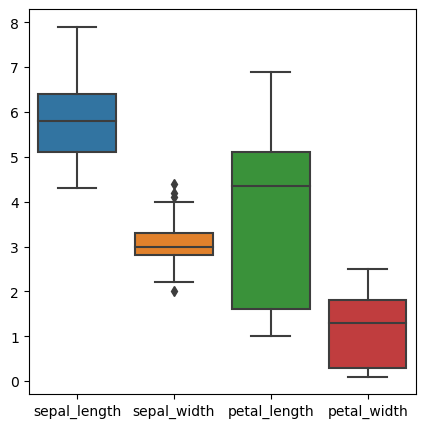

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.show() 

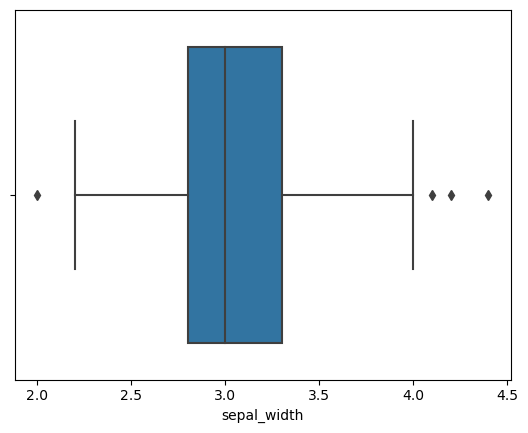

In [13]:
sns.boxplot(data=data,x="sepal_width")
plt.show()

In [14]:
q1=np.quantile(data["sepal_width"],0.25)
q3=np.quantile(data["sepal_width"],0.75)
iqr=q3-q1
upper_wisker=q3+1.5*iqr
lower_wisker=q1-1.5*iqr
print(upper_wisker,lower_wisker)

4.05 2.05


In [15]:
sepal_out=data[data["sepal_width"]>4.05].index
data.loc[sepal_out,"sepal_width"]=4.05

In [16]:
sepal_out=data[data["sepal_width"]<2.05].index
data.loc[sepal_out,"sepal_width"]=2.05

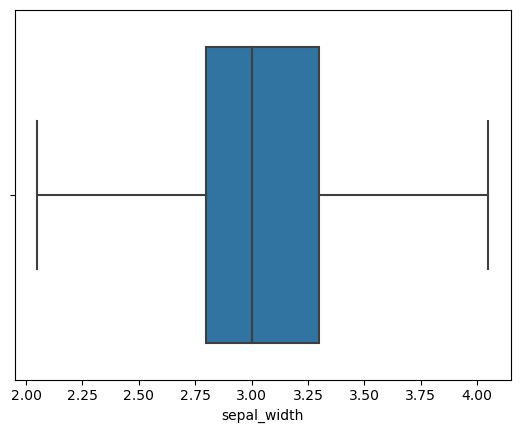

In [17]:
sns.boxplot(data=data,x="sepal_width")
plt.show()

# the skew

In [18]:
data.skew()

sepal_length    0.314911
sepal_width     0.207094
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [19]:
colnames=data.select_dtypes(include=['int64', 'float64']).columns

In [20]:
colnames

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [21]:
from scipy.stats import skew

sepal_length
0.3117530585022963


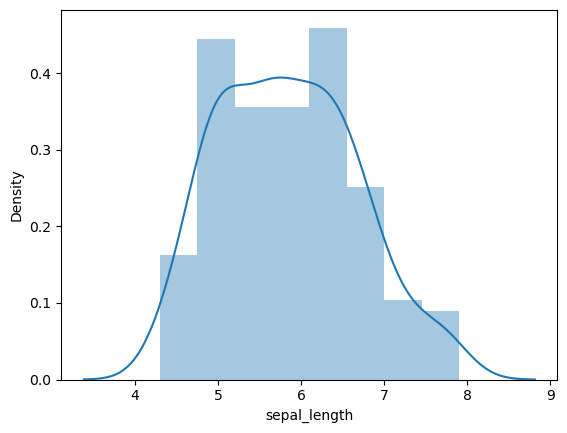

sepal_width
0.20501741309200877


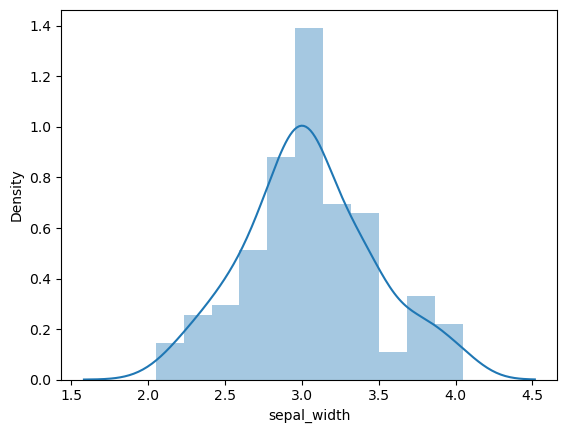

petal_length
-0.2717119501716388


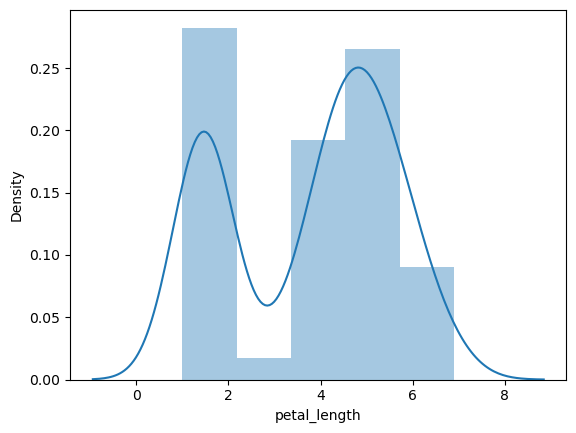

petal_width
-0.10394366626751729


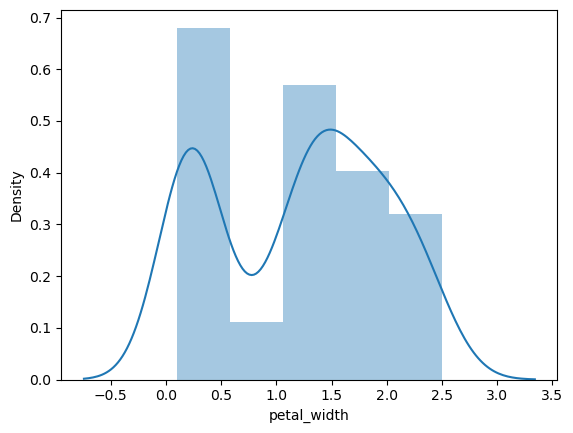

In [22]:
for i in data[colnames]:
    print(i)
    print(skew(data[i]))
    plt.figure()
    sns.distplot(data[i])
    plt.show()

# split into feature and target

In [63]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [24]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

# encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
from keras.utils import np_utils

In [29]:
y=np_utils.to_categorical(y)

# splitting train and test data

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# artificial neural network

In [58]:
ann=Sequential()
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=3,activation="softmax"))
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
ann.fit(xtrain,ytrain,batch_size=20,epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 1.0951 - accuracy: 0.3048
Epoch 2/200
6/6 [==============================] - 0s 0s/step - loss: 1.0806 - accuracy: 0.3048
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.3143
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 1.0542 - accuracy: 0.3810
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0429 - accuracy: 0.4476
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0326 - accuracy: 0.5429
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 1.0225 - accuracy: 0.6095
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 1.0115 - accuracy: 0.6381
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.9995 - accuracy: 0.6381
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.9875 - accuracy: 0.6476
Epoch 11/200
6/6 [============

6/6 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9619
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.9619
Epoch 86/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.9714
Epoch 87/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.9619
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2606 - accuracy: 0.9714
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2561 - accuracy: 0.9714
Epoch 90/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.9714
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9619
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9619
Epoch 93/200
6/6 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.9714
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.9714
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9714
Epoch 169/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1328 - accuracy: 0.9714
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 0.9714
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9714
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.9714
Epoch 173/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.9714
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9714
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9714
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.1281 - accuracy: 0.9714
Epoch 177/200
6/6 [=====

In [64]:
ypred=ann.predict(xtest)

2/2 [==============================] - 0s 0s/step


In [60]:
ypred

array([[9.9992073e-01, 7.9288140e-05, 2.1213068e-11],
       [5.5646151e-02, 9.3788642e-01, 6.4675012e-03],
       [4.2523113e-03, 9.6929806e-01, 2.6449535e-02],
       [9.9968314e-01, 3.1684231e-04, 3.1505759e-10],
       [1.5066621e-04, 3.2489312e-01, 6.7495620e-01],
       [2.9454571e-03, 9.1839749e-01, 7.8657024e-02],
       [3.1763912e-04, 2.2661881e-01, 7.7306360e-01],
       [9.9618965e-01, 3.8104125e-03, 1.9890271e-08],
       [9.9583071e-01, 4.1693258e-03, 4.4792142e-08],
       [3.7717469e-05, 4.8669141e-02, 9.5129317e-01],
       [5.0208191e-03, 8.8532007e-01, 1.0965916e-01],
       [9.9876022e-01, 1.2397753e-03, 2.5808891e-09],
       [2.2188820e-05, 3.3715039e-02, 9.6626276e-01],
       [3.8503993e-03, 9.6094656e-01, 3.5203066e-02],
       [3.2199367e-03, 8.3503234e-01, 1.6174777e-01],
       [9.9813485e-01, 1.8650627e-03, 1.6069205e-08],
       [6.6830232e-03, 9.5000494e-01, 4.3312039e-02],
       [3.2416226e-03, 7.9885679e-01, 1.9790161e-01],
       [9.9806553e-01, 1.934

In [61]:
ypred=ypred>0.5

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45

